In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import string
from nltk import word_tokenize
from IPython.display import clear_output

In [2]:
funded_projects = pd.DataFrame()
for root, dirs, files in os.walk("data/completed_full_csv_parts/", topdown=True):
    for file in files:
        df = pd.read_csv(os.path.join(root, file))
        funded_projects = funded_projects.append(df)

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,5,11,12,15,17,19,23,24,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,12,19,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,11,12,15,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (

In [3]:
funded_projects.head()

,APPLICATION_ID,ARRA_FUNDED,AWARD_NOTICE_DATE,BUDGET_END,BUDGET_START,CFDA_CODE,CORE_PROJECT_NUM,DIRECT_COST_AMT,ED_INST_TYPE,FOA_NUMBER,...,PROJECT_START,PROJECT_TERMS,PROJECT_TITLE,STUDY_SECTION,SUBPROJECT_ID,SUFFIX,TOTAL_COST,TOTAL_COST_SUB_PROJECT,ABSTRACT_TEXT,grant_num
0,7345435,NaN,2007-12-28T00:00:00,12/29/2008,12/30/2007,NaN,U01CI000309,NaN,NaN,RFA-CI-05-26,...,12/30/2004,NaN,California Emerging Infections Program,ZCI1,NaN,NaN,NaN,NaN,"In this proposal,theCaliforniaDepartmentof Hea...",U01CI000309
1,7350266,NaN,2007-11-19T00:00:00,12/29/2008,12/30/2007,NaN,U01CI000310,NaN,NaN,RFA-CI-05-26,...,12/30/2004,NaN,Maryland Emerging Infections Program,ZCI1,NaN,NaN,NaN,NaN,The Maryland Emerging Infections Program (MD E...,U01CI000310
2,7354803,NaN,2007-12-28T00:00:00,12/29/2008,12/30/2007,NaN,U01CI000311,NaN,NaN,RFA-CI-05-26,...,12/30/2004,NaN,Emerging Infections Program,ZCI1,NaN,NaN,NaN,NaN,This proposalseekstoprovidecontinuedsupportfor...,U01CI000311
3,7354796,NaN,2008-01-02T00:00:00,12/29/2008,12/30/2007,NaN,U01CI000312,NaN,NaN,RFA-CI-05-26,...,12/30/2004,NaN,Emerging Infections Program,ZCI1,NaN,NaN,NaN,NaN,The Emerging Infections Programs in Georgia wi...,U01CI000312
4,7350267,NaN,2008-01-02T00:00:00,12/29/2008,12/30/2007,NaN,U01CI000313,NaN,NaN,RFA-CI-05-26,...,12/30/2004,NaN,Emerging Infections Programs,ZCI1,NaN,NaN,NaN,NaN,Increasing knowledge about emerging infections...,U01CI000313


In [4]:
years = funded_projects.FY.astype(int).sort_values().unique().tolist()

In [5]:
dfs = list()
for year in years:
    df = funded_projects[funded_projects["FY"] == year]
    dfs.append(df)
    
[_1985,
 _1986,
 _1987,
 _1988,
 _1989,
 _1990,
 _1991,
 _1992,
 _1993,
 _1994,
 _1995,
 _1996,
 _1997,
 _1998,
 _1999,
 _2000,
 _2001,
 _2002,
 _2003,
 _2004,
 _2005,
 _2006,
 _2007,
 _2008,
 _2009,
 _2010,
 _2011,
 _2012,
 _2013,
 _2014,
 _2015,
 _2016,
 _2017,
 _2018] = dfs

# Figure out a way to identify these. Remove them so won't interfere with analysis and come back to it later.

In [15]:
# Just deal with _2008 for right now
_2008.ABSTRACT_TEXT[0]

'In this proposal,theCaliforniaDepartmentof HealthServices(CDHS), the Universityof California,Berkeley  Schoolof PublicHealth(UCBSPH), selectedlocalandcountyhealthdepartmentsa, ndotherpartners requestan additionafliveyears of supportfortheCaliforniaEmergingInfectionsProgram(CaliforniaEIP), whichwas establishedin 1994withsupportfromthe Centersfor DiseasecontrolandPrevention(CDC) and re-fundedin1999.We proposeto implementorcontinueactivebacterial coresurveillanceand related activities(ABCs);activep0pulation-basedlaboratorysurveillancefor foodbornediseasesandrelated activities,(FoodNet);activesurveillanceforrespiratorydiseasesyndromes, developmentof surgecapacity that canassistinflexibleresponsesto newlyemerginginfectiousdiseasethreats;participationin rapid populationsurveys;integratedhepatitissurveillance,includingenhancedsurveillancefor acuteviral hepatitis andforchronicviral hepatitisand liver disease;activesurveillancefor encephalitisof possiblyinfectious etiology;population-basedsurv

In [14]:
counter_bad = 0
for l in _2008.ABSTRACT_TEXT[0]:
    if l == " ":
        counter_bad += 1
        
counter_bad

91

In [9]:
funded_projects.ABSTRACT_TEXT.head(50)

0     In this proposal,theCaliforniaDepartmentof Hea...
1     The Maryland Emerging Infections Program (MD E...
2     This proposalseekstoprovidecontinuedsupportfor...
3     The Emerging Infections Programs in Georgia wi...
4     Increasing knowledge about emerging infections...
5     Governments in Africa are beginning to deploy ...
6     The proposal aims at addressing the burden of ...
7     The Liverpool School of Tropical Medicine (LST...
8     We proposea ChicagoAntimicrobialResistanceand ...
9     Improvingthe efficiencyof surveillancefor heal...
10    This is the competitiverenewalapplicationfor t...
11    We proposeto establisha CDC-fundedEpi-Centerfo...
12    This is a competingrenewalapplicationfor the E...
13      [unreadable] DESCRIPTION (provided by applic...
14       DESCRIPTION (provided by applicant): Our lo...
15      [unreadable] DESCRIPTION (provided by applic...
16       DESCRIPTION (provided by applicant): Broad ...
17       DESCRIPTION (provided by applicant): Th

In [10]:
bad_abs = [0, 2, 8, 9, 10, 11, 12]

In [85]:
funded_projects.ABSTRACT_TEXT.iloc[37]

"  [unreadable] DESCRIPTION (provided by applicant): The EMERGEncy ID NET program is a sentinel network of 11 geographically-diverse, university-affiliated hospital emergency departments in the United States. This program, which has been funded by the Centers for Disease Control (CDC) since 1995, was established to address the threat of emerging infectious diseases by assessing disease prevalence, risk factors, and management practices for acute presentations from the community among a diverse population presenting to emergency departments. EMERGEncy ID NET has prospectively conducted several investigations, most recently addressing uropathogen antimicrobial resistance and outcomes among patients with acute pyelonephritis; specific host gene responses to infections; emergency physicians' (EPs) attitudes towards smallpox vaccination and perceived risk of a bioterrorist threat; and the prevalence of methicillin-resistant Staphylococcus aureus (MRSA) among patients with skin and soft tiss

In [108]:
punct = [p for p in string.punctuation]

In [144]:
things_to_remove = ["unreadable",
                    "[unreadable]",
                    "DESCRIPTION",
                    "(provided by applicant):",
                    "Application not provided", 
                    "Description Provided by Applicant"]

In [145]:
things_to_remove.extend(punct)

In [17]:
abs_2008 = _2008.ABSTRACT_TEXT.tolist()

In [18]:
abs_2008

['In this proposal,theCaliforniaDepartmentof HealthServices(CDHS), the Universityof California,Berkeley  Schoolof PublicHealth(UCBSPH), selectedlocalandcountyhealthdepartmentsa, ndotherpartners requestan additionafliveyears of supportfortheCaliforniaEmergingInfectionsProgram(CaliforniaEIP), whichwas establishedin 1994withsupportfromthe Centersfor DiseasecontrolandPrevention(CDC) and re-fundedin1999.We proposeto implementorcontinueactivebacterial coresurveillanceand related activities(ABCs);activep0pulation-basedlaboratorysurveillancefor foodbornediseasesandrelated activities,(FoodNet);activesurveillanceforrespiratorydiseasesyndromes, developmentof surgecapacity that canassistinflexibleresponsesto newlyemerginginfectiousdiseasethreats;participationin rapid populationsurveys;integratedhepatitissurveillance,includingenhancedsurveillancefor acuteviral hepatitis andforchronicviral hepatitisand liver disease;activesurveillancefor encephalitisof possiblyinfectious etiology;population-basedsur

In [30]:
abstracts_2008 = list()
for a in abs_2008:
    abstract = word_tokenize(a)
    abstracts_2008.append(abstract)

In [123]:
abstracts_2008[0]

['In',
 'this',
 'proposal',
 ',',
 'theCaliforniaDepartmentof',
 'HealthServices',
 '(',
 'CDHS',
 ')',
 ',',
 'the',
 'Universityof',
 'California',
 ',',
 'Berkeley',
 'Schoolof',
 'PublicHealth',
 '(',
 'UCBSPH',
 ')',
 ',',
 'selectedlocalandcountyhealthdepartmentsa',
 ',',
 'ndotherpartners',
 'requestan',
 'additionafliveyears',
 'of',
 'supportfortheCaliforniaEmergingInfectionsProgram',
 '(',
 'CaliforniaEIP',
 ')',
 ',',
 'whichwas',
 'establishedin',
 '1994withsupportfromthe',
 'Centersfor',
 'DiseasecontrolandPrevention',
 '(',
 'CDC',
 ')',
 'and',
 're-fundedin1999.We',
 'proposeto',
 'implementorcontinueactivebacterial',
 'coresurveillanceand',
 'related',
 'activities',
 '(',
 'ABCs',
 ')',
 ';',
 'activep0pulation-basedlaboratorysurveillancefor',
 'foodbornediseasesandrelated',
 'activities',
 ',',
 '(',
 'FoodNet',
 ')',
 ';',
 'activesurveillanceforrespiratorydiseasesyndromes',
 ',',
 'developmentof',
 'surgecapacity',
 'that',
 'canassistinflexibleresponsesto',
 'new

In [116]:
test = [word for word in abstracts_2008[0] if word not in things_to_remove]

In [117]:
test

['In',
 'this',
 'proposal',
 'theCaliforniaDepartmentof',
 'HealthServices',
 'CDHS',
 'the',
 'Universityof',
 'California',
 'Berkeley',
 'Schoolof',
 'PublicHealth',
 'UCBSPH',
 'selectedlocalandcountyhealthdepartmentsa',
 'ndotherpartners',
 'requestan',
 'additionafliveyears',
 'of',
 'supportfortheCaliforniaEmergingInfectionsProgram',
 'CaliforniaEIP',
 'whichwas',
 'establishedin',
 '1994withsupportfromthe',
 'Centersfor',
 'DiseasecontrolandPrevention',
 'CDC',
 'and',
 're-fundedin1999.We',
 'proposeto',
 'implementorcontinueactivebacterial',
 'coresurveillanceand',
 'related',
 'activities',
 'ABCs',
 'activep0pulation-basedlaboratorysurveillancefor',
 'foodbornediseasesandrelated',
 'activities',
 'FoodNet',
 'activesurveillanceforrespiratorydiseasesyndromes',
 'developmentof',
 'surgecapacity',
 'that',
 'canassistinflexibleresponsesto',
 'newlyemerginginfectiousdiseasethreats',
 'participationin',
 'rapid',
 'populationsurveys',
 'integratedhepatitissurveillance',
 'inclu

In [118]:
lengths = list()
for w in test:
    l = len(w)
    lengths.append(l)

In [119]:
np.mean(lengths)

14.508620689655173

In [120]:
lengths

[2,
 4,
 8,
 25,
 14,
 4,
 3,
 12,
 10,
 8,
 8,
 12,
 6,
 40,
 15,
 9,
 19,
 2,
 48,
 13,
 8,
 13,
 22,
 10,
 27,
 3,
 3,
 18,
 9,
 34,
 19,
 7,
 10,
 4,
 47,
 27,
 10,
 7,
 48,
 13,
 13,
 4,
 30,
 37,
 15,
 5,
 17,
 31,
 32,
 10,
 9,
 18,
 12,
 5,
 7,
 21,
 14,
 18,
 8,
 30,
 19,
 22,
 10,
 10,
 25,
 10,
 5,
 2,
 3,
 3,
 20,
 6,
 3,
 28,
 12,
 44,
 25,
 2,
 9,
 10,
 32,
 11,
 7,
 11,
 10,
 10,
 8,
 14,
 16,
 11,
 8,
 70,
 13,
 2,
 15,
 3,
 2,
 1,
 11,
 19,
 2,
 21,
 9,
 6,
 2,
 10,
 46,
 4,
 17,
 3,
 13,
 4,
 10,
 2,
 50,
 5]

In [133]:
def average_token_length(doc):
    """calculate the average length of each token in a document"""
    
    #remove stop words and punctuation
    doc_stop = [word for word in doc if word not in things_to_remove]
    
    #make list of lengths of each token
    lengths = list()
    for word in doc_stop:
        l = len(word)
        lengths.append(l)
        
    #calculate mean
    if len(lengths) > 0:
        mean = np.mean(lengths)
    else:
        mean = 0
    
    return(mean)

In [146]:
means = list()
for a in abstracts_2008:
    means.append(average_token_length(a))

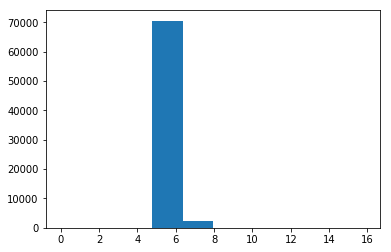

In [147]:
plt.hist(means);

In [148]:
means

[14.508620689655173,
 6.025925925925926,
 12.770833333333334,
 5.813559322033898,
 6.382530120481928,
 5.561933534743202,
 5.661174047373842,
 5.64957264957265,
 7.4227642276422765,
 8.696324951644101,
 7.471304347826087,
 7.63875968992248,
 7.896309314586995,
 6.291044776119403,
 5.483695652173913,
 6.248427672955975,
 5.87719298245614,
 5.014035087719298,
 6.06006006006006,
 5.721407624633431,
 6.026785714285714,
 5.788617886178862,
 5.295620437956204,
 5.295620437956204,
 6.075812274368231,
 5.449579831932773,
 6.019108280254777,
 6.382089552238806,
 6.241279069767442,
 5.942675159235669,
 5.840764331210191,
 5.887788778877888,
 5.969899665551839,
 5.873563218390805,
 6.14621409921671,
 5.113157894736842,
 5.31875,
 5.856807511737089,
 5.856807511737089,
 6.2357512953367875,
 5.997067448680352,
 5.5989010989010985,
 5.5989010989010985,
 5.796116504854369,
 5.601466992665037,
 5.740437158469946,
 5.740437158469946,
 5.858611825192802,
 5.858611825192802,
 6.266666666666667,
 6.292626

In [149]:
questionable_abs = []
for ind, mean in enumerate(means):
    if mean >= 7:
        questionable_abs.append(ind)

In [150]:
len(questionable_abs)

38

In [151]:
questionable_abs

[0,
 2,
 8,
 9,
 10,
 11,
 12,
 1676,
 1713,
 2370,
 2371,
 2372,
 2382,
 2383,
 7062,
 13638,
 15042,
 15043,
 17003,
 17006,
 21566,
 29851,
 31554,
 36717,
 55023,
 57828,
 59918,
 61925,
 61929,
 64744,
 64746,
 65108,
 66654,
 67756,
 67806,
 67807,
 68030,
 71293]

In [152]:
_2008.ABSTRACT_TEXT.iloc[questionable_abs].tolist()

['In this proposal,theCaliforniaDepartmentof HealthServices(CDHS), the Universityof California,Berkeley  Schoolof PublicHealth(UCBSPH), selectedlocalandcountyhealthdepartmentsa, ndotherpartners requestan additionafliveyears of supportfortheCaliforniaEmergingInfectionsProgram(CaliforniaEIP), whichwas establishedin 1994withsupportfromthe Centersfor DiseasecontrolandPrevention(CDC) and re-fundedin1999.We proposeto implementorcontinueactivebacterial coresurveillanceand related activities(ABCs);activep0pulation-basedlaboratorysurveillancefor foodbornediseasesandrelated activities,(FoodNet);activesurveillanceforrespiratorydiseasesyndromes, developmentof surgecapacity that canassistinflexibleresponsesto newlyemerginginfectiousdiseasethreats;participationin rapid populationsurveys;integratedhepatitissurveillance,includingenhancedsurveillancefor acuteviral hepatitis andforchronicviral hepatitisand liver disease;activesurveillancefor encephalitisof possiblyinfectious etiology;population-basedsur

# Not perfect but the majority of things captured are bad entries, mainly due to merged words. Other things that are picked up are also errors so not terrible that they are picked up. Only a handful of things are not actual errors, since list is short could go through and handpick the non-errors but may not scale and could introduce bias. Will not remove correct abstracts from list, hopefully won't skew data (too much)

# Run a few other years through function and see if it works for them too/they don't have errors?

In [153]:
def find_bad_abstracts(df):
    
    abs_list = df.ABSTRACT_TEXT.tolist()
    
    abstracts = list()
    for abst in abs_list:
        abstract = word_tokenize(abst)
        abstracts.append(abstract)
        
    means = list()
    for a in abstracts:
        means.append(average_token_length(a))
        
    questionable_abs = []
    for ind, mean in enumerate(means):
        if mean >= 7:
            questionable_abs.append(ind)
    
    return((means, questionable_abs))

In [158]:
results = list()
total_number_dfs = len(dfs)
for ind, df in enumerate(dfs):
    results.append(find_bad_abstracts(df))
    clear_output()
    print("Finished {} out of {} dfs!".format(ind+1, total_number_dfs))

Finished 12 out of 34 dfs!


KeyboardInterrupt: 

In [159]:
results

[([6.0,
   6.0,
   6.0,
   6.0,
   5.362903225806452,
   5.984924623115578,
   5.8994708994708995,
   5.96039603960396,
   5.51360544217687,
   5.289962825278811,
   5.663841807909605,
   5.770370370370371,
   5.663978494623656,
   5.852589641434263,
   5.808219178082192,
   5.598513011152416,
   5.308457711442786,
   5.442748091603053,
   5.6835443037974684,
   6.007751937984496,
   5.267857142857143,
   5.629213483146067,
   5.909090909090909,
   5.678807947019868,
   5.5121107266435985,
   5.303149606299213,
   5.346007604562738,
   6.078838174273859,
   5.635294117647059,
   6.13768115942029,
   5.753943217665615,
   5.6050955414012735,
   5.76536312849162,
   6.189090909090909,
   6.146496815286624,
   5.385474860335195,
   5.772435897435898,
   6.0,
   5.307277628032345,
   5.6075949367088604,
   5.897637795275591,
   5.407407407407407,
   6.149305555555555,
   5.336231884057971,
   6.188976377952756,
   5.5030674846625764,
   5.201591511936339,
   6.294871794871795,
   5.5597014

In [172]:
_1996.ABSTRACT_TEXT.iloc[results[11][1]].tolist()

['The University of Alabama at Birmingham General Clinical Research Center is a multidisciplinary facility available to faculty members of the Schools of Medicine and Dentistry for the pursuit of clinical investigation.  The GCRC and its staff facilitate the meticulous control of experimental conditions, close observation and accurate monitoring of biologic phenomena, and the precise measurement of biochemical and physiological events which occur in patients and normal volunteers participating in research activities.  Facilities of the Center increase the efficiency and productivity of research efforts on individually funded projects, afford participants more flexibility in taking new research directions, and promote more collaborative research among a group having multidisciplinary approaches to science.  Research projects involve the following investigations:  post-transplantation hypertension, disorders of the immune system, renal diseases, multiple sclerosis, herpesvirus infections

# Opened up a few random ones and the ones that are pulled out as questionable abstracts are actually fine, some strange formatting but no merged words or anything that would be a red flag that would make downsteam nlp bad. Cut it off at 12 so maybe let it run the rest and check them but so far it looks like its limited to FY 2008. Strange, not sure why...